# Alpha Vantage

***

First, you'll need to pip install the alpha-vantage module. Hence, open Anaconda Prompt and run **pip install alpha-vantage**.
<br> <br>
Then, you need to go to https://www.alphavantage.co/ and click on "Get Your Free API Key". Save it, as you will need to replace all "INSERT-YOUR-API-KEY-HERE" strings you see within the code presented in this document.

Then, import the usual modules for retrieving and manipulating financial data in Python:

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

From the module you just installed, you need to import **TimeSeries**. Hence, the following line of code will do the job.

In [0]:
from alpha_vantage.timeseries import TimeSeries

Then, with the following line, designate your API key, as well as the format in which you would like to retrieve the data. In our case, this will be the 'pandas' module.

In [0]:
ts = TimeSeries(key = 'WWPS6CCWENSNDASU', output_format='pandas')

Finally, give a name to the new variable, containing the name of the stock and a suffix indicating the API we have retrieved the data from. <br>
Next to this new variable, you need to give the name to "metadata", as it will be storing information about the dataset retrieved.

Then, apply the **.get_daily_adjusted()** method to obtain the adjusted closing prices for the designated stock.

In [0]:
Hdfc, metadata = ts.get_daily_adjusted('BSE:HDFC', outputsize='full')
Hdfc = Hdfc.sort_index(axis=0)
Hdfc

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2000-01-03,30.0,30.885,29.305,30.885,3.5951,6243965.0,0.0,1.0
2000-01-04,32.3,32.350,29.400,30.375,3.5357,3547675.0,0.0,1.0
2000-01-05,29.9,30.100,28.000,29.200,3.3989,2522065.0,0.0,1.0
2000-01-06,29.5,30.340,29.200,29.410,3.4234,1994390.0,0.0,1.0
2000-01-07,29.2,29.480,27.930,28.500,3.3174,3132470.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2020-04-03,1584.4,1584.400,1483.150,1499.400,1499.4000,201240.0,0.0,1.0
2020-04-07,1575.0,1577.700,1518.700,1555.200,1555.2000,351175.0,0.0,1.0
2020-04-08,1541.0,1690.350,1540.000,1557.350,1557.3500,377331.0,0.0,1.0


Apart from stocks, tickers such as SENSEX (^BSESN) can also be retrieved.

In [0]:
Sensex, metadata = ts.get_daily_adjusted('^BSESN', outputsize='full')
Sensex = Sensex.sort_index(axis=0)
Sensex.loc['2020-01-03']

1. open                 41634.5117
2. high                 41636.1797
3. low                  41348.6797
4. close                41464.6094
5. adjusted close       41464.6094
6. volume                8900.0000
7. dividend amount          0.0000
8. split coefficient        1.0000
Name: 2020-01-03 00:00:00, dtype: float64

To combine specific columns from various stocks, one would need to *concatenate* the columns of interest by using the **.concat()** function to specify which columns you want to extract.

In [0]:
pfolio_av = pd.concat([Hdfc['4. close'], Sensex['4. close']], axis = 1)
pfolio_av.columns = ['HDFC', 'SENSEX']
pfolio_av

,HDFC,SENSEX
date,,
2000-01-03,30.885,5375.1099
2000-01-04,30.375,5491.0098
2000-01-05,29.200,5357.0000
2000-01-06,29.410,5421.5298
2000-01-07,28.500,5414.4800
...,...,...
2020-04-03,1499.400,27590.9492
2020-04-07,1555.200,30067.2109
2020-04-08,1557.350,29893.9609


In [0]:
Hdfc['Return'] = ( ( Hdfc['4. close'] - Hdfc['4. close'].shift(1) )/ Hdfc['4. close'].shift(1) )
Hdfc['Return'].mean()

0.0010415539448957389

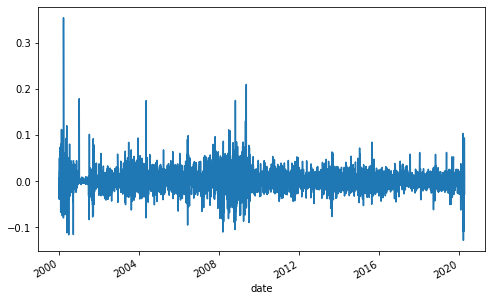

In [0]:
Hdfc['Return'].plot(figsize = (8,5))
plt.show()

In [0]:
annual_returnper = Hdfc['Return'].mean() * 250 * 100
annual_returnper

26.038848622393473

In [0]:
Hdfc['Log Return'] = np.log(Hdfc['4. close'] / Hdfc['4. close'].shift(1))
logreturn_annualper = 250 * Hdfc['Log Return'].mean() * 100
logreturn_annualper

19.606743878776072

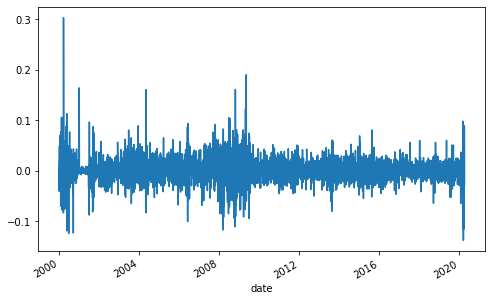

In [0]:
Hdfc['Log Return'].plot(figsize = (8,5))
plt.show()